In [ ]:
options(warn=-1)
library("readxl")
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [ ]:
galletitas <- read_excel("C:/Users/maf01/Desktop/EDM 2023/galletitas.xls")
galletitas

Compañía,Marca,Tipo,Valor energetico (kcalorias/100g),Carbohidratos (g/100g),Proteinas (g/100g),Grasas totales (g/100g),Sodio (mg/100g)
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
A,Cerealeras,Salada,439,65,11,15,574
C,Tiritas,Salada,466,57,10,22,828
B,Expresas,Salada,445,69,11,14,12
C,Negritas,Dulce,478,67,5.6,21,363
A,Rellenitas,Dulce,464,70,6.3,18,263
A,Papitos,Dulce,463,66,7.1,19,136
B,Criollas,Salada,438,69,11,13,431
A,Merengueti,Dulce,418,69,6.3,13,201
B,Frutillitas,Dulce,423,70,6.8,13,241


In [ ]:
colnames(galletitas)=c("Compañia","Marca","Tipo","Calorias","Carbohidratos","Proteinas","Grasas","Sodio")

In [ ]:
str(galletitas)

tibble [17 x 8] (S3: tbl_df/tbl/data.frame)
 $ Compañia     : chr [1:17] "A" "C" "B" "C" ...
 $ Marca        : chr [1:17] "Cerealeras" "Tiritas" "Expresas" "Negritas" ...
 $ Tipo         : chr [1:17] "Salada" "Salada" "Salada" "Dulce" ...
 $ Calorias     : num [1:17] 439 466 445 478 464 463 438 418 423 444 ...
 $ Carbohidratos: chr [1:17] "65" "57" "69" "67" ...
 $ Proteinas    : chr [1:17] "11" "10" "11" "5.6" ...
 $ Grasas       : num [1:17] 15 22 14 21 18 19 13 13 13 13 ...
 $ Sodio        : chr [1:17] "574" "828" "12" "363" ...


In [ ]:
galletitas$Compañia<-as.factor(galletitas$Compañia)
galletitas$Marca<-as.factor(galletitas$Marca)
galletitas$Tipo<-as.factor(galletitas$Tipo)
galletitas$Carbohidratos<-as.numeric(galletitas$Carbohidratos)
galletitas$'Grasas'<-as.numeric(galletitas$'Grasas')
galletitas$'Calorias'<-as.numeric(galletitas$'Calorias')
galletitas$'Proteinas'<-as.numeric(galletitas$'Proteinas')
galletitas$'Sodio'<-as.numeric(galletitas$'Sodio')

**Vector de Medias

In [ ]:
perfil_medio<- galletitas %>% group_by(Compañia) %>% summarise_all(mean)
perfil_medio

Compañia,Marca,Tipo,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,NA,NA,435.8333,67.50000,7.95,15.0,362.1167
B,NA,NA,429.0000,64.61667,8.80,15.0,241.8950
C,NA,NA,468.6000,62.40000,8.64,20.4,712.6000


**Vector de Medianas

In [ ]:
vector_medianas<-rbind(apply(filter(galletitas,Compañia=="A")[,4:8],2,median), apply(filter(galletitas,Compañia=="B")[,4:8],2,median),
                       apply(filter(galletitas,Compañia=="C")[,4:8],2,median))
vector_medianas

Calorias,Carbohidratos,Proteinas,Grasas,Sodio
431.5,67.5,6.7,14,232.000
430.0,66.0,8.9,14,158.835
466.0,60.0,9.0,22,828.000


**Matriz de Varianza y Covarianza

In [ ]:
Comp_A<-filter(galletitas,Compañia=="A")
round(cov(Comp_A[,4:8]),2)

Comp_B<-filter(galletitas,Compañia=="B")
round(cov(Comp_B[,4:8]),2)

Comp_C<-filter(galletitas,Compañia=="C")
round(cov(Comp_C[,4:8]),2)

,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
Calorias,566.17,-9.50,-2.07,67.80,-859.24
Carbohidratos,-9.50,5.90,-5.09,-0.80,-528.65
Proteinas,-2.07,-5.09,5.72,-1.06,676.41
Grasas,67.80,-0.80,-1.06,8.40,-234.62
Sodio,-859.24,-528.65,676.41,-234.62,95564.00


,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
Calorias,172.40,40.74,16.02,-9.40,-604.19
Carbohidratos,40.74,30.80,6.89,-11.98,269.68
Proteinas,16.02,6.89,5.84,-3.72,307.53
Grasas,-9.40,-11.98,-3.72,5.60,-309.98
Sodio,-604.19,269.68,307.53,-309.98,58522.01


,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
Calorias,334.80,-53.30,-20.48,65.20,2975.05
Carbohidratos,-53.30,55.80,-8.12,-26.20,-2068.55
Proteinas,-20.48,-8.12,4.47,-0.57,311.52
Grasas,65.20,-26.20,-0.57,18.30,1023.70
Sodio,2975.05,-2068.55,311.52,1023.70,105525.30


**Boxplot Comparativos

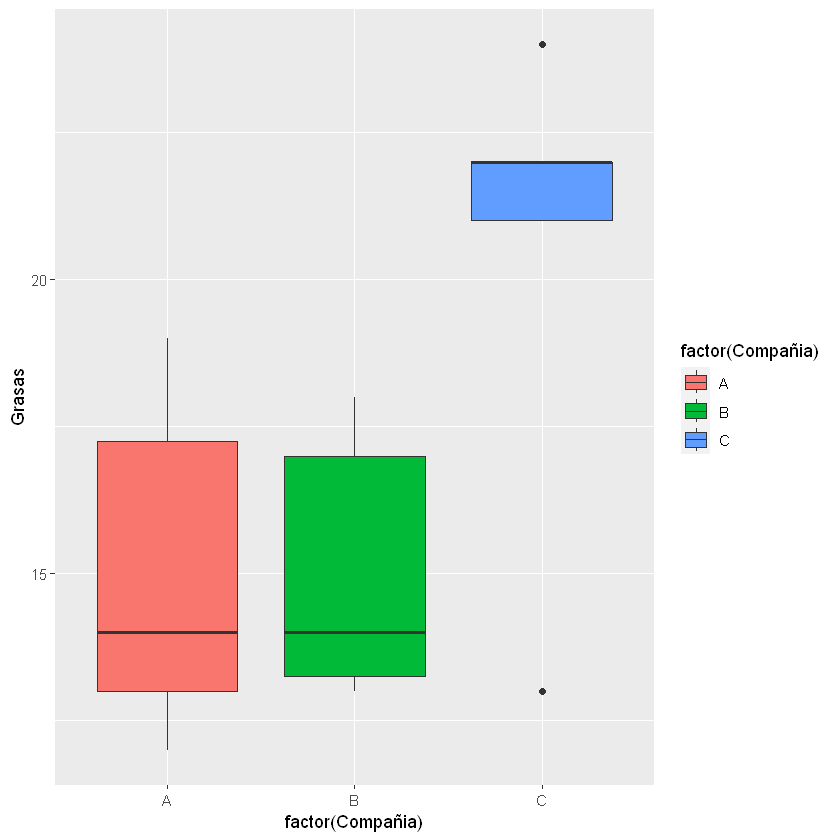

In [ ]:
library(ggplot2)
g2 <- ggplot(galletitas, aes(factor(Compañia), Grasas))
g2 + geom_boxplot(aes(fill = factor(Compañia)))

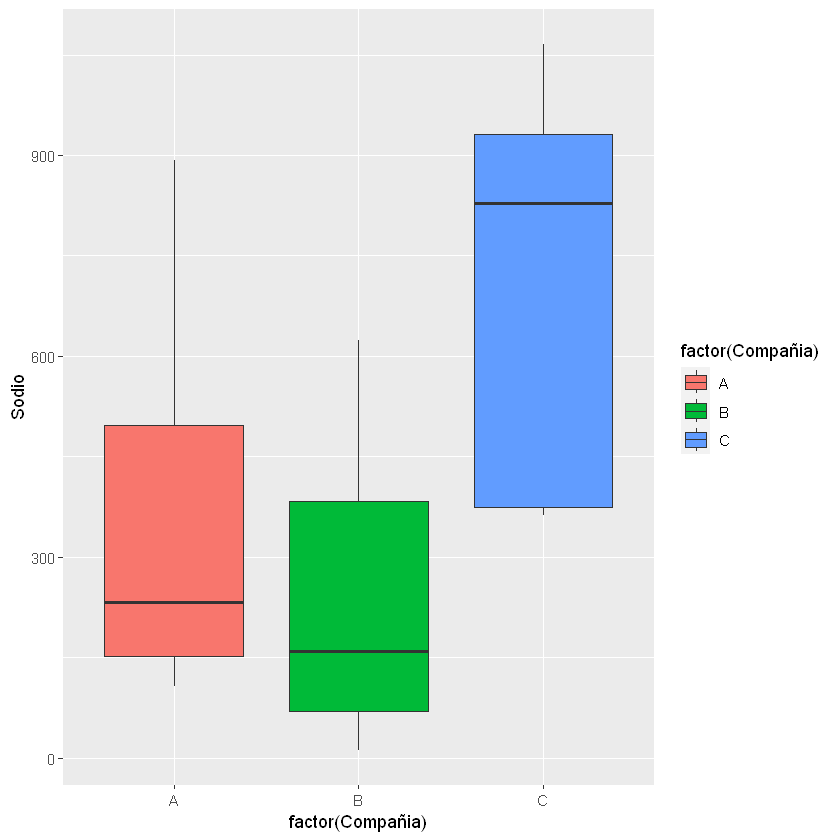

In [ ]:
g2 <- ggplot(galletitas, aes(factor(Compañia), Sodio))
g2 + geom_boxplot(aes(fill = factor(Compañia)))

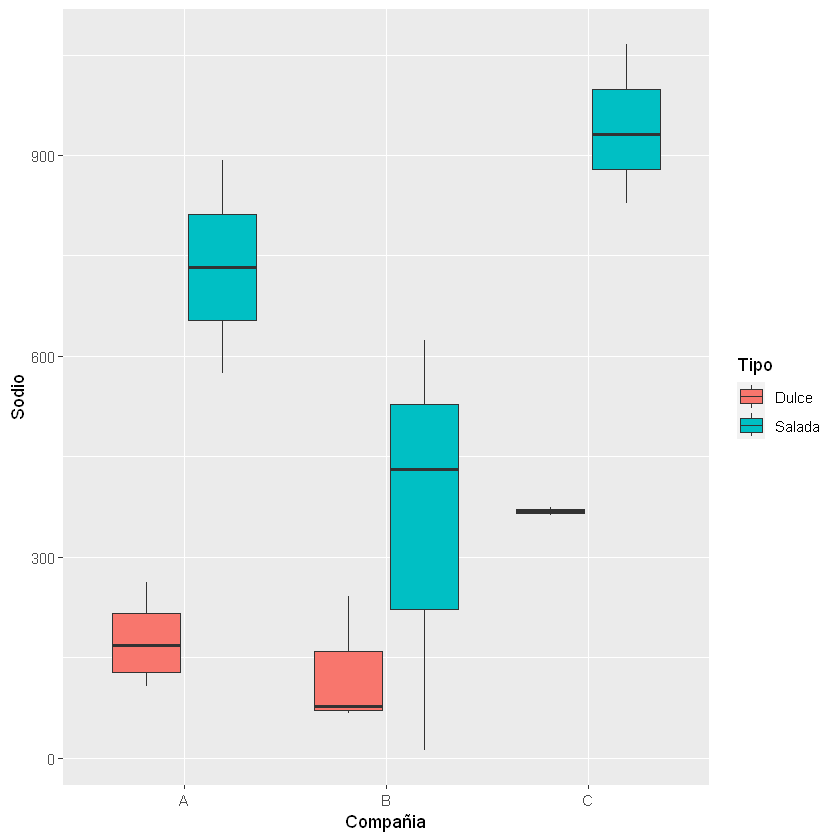

In [ ]:
ggplot (galletitas, aes (x = Compañia, y = Sodio, fill = Tipo)) +
  geom_boxplot ()

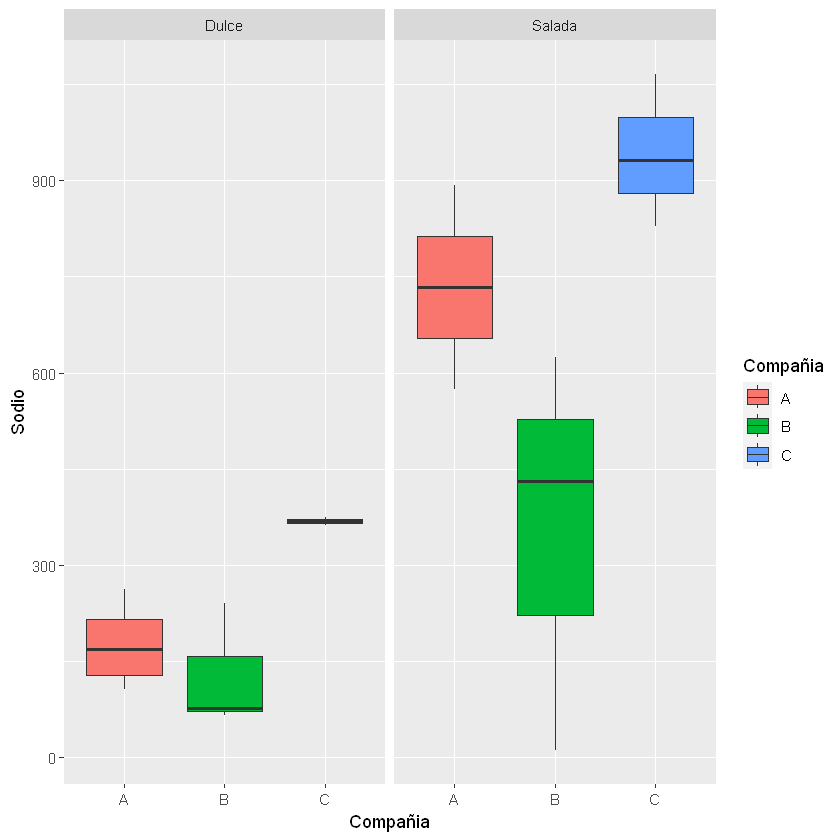

In [ ]:
ggplot (galletitas, aes (x = Compañia, y = Sodio, fill = Compañia)) +
  geom_boxplot () +
   facet_wrap (~ Tipo)

**Valores Atípicos

In [ ]:
#esta libreria  permite encontrar outliers multivariados
library(rstatix) #conda install -c conda-forge r-rstatix
mahalanobis_distance(data = galletitas[, c("Calorias", "Carbohidratos","Proteinas","Grasas","Sodio")])$is.outlier


Attaching package: 'rstatix'


The following object is masked from 'package:stats':

    filter




[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE

VALORES MÁS ALEJADOS

In [ ]:
library('DMwR2') #conda install -c conda-forge r-dmwr2
library("MASS")
library("lattice")
library("grid")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'MASS'


The following object is masked from 'package:rstatix':

    select


The following object is masked from 'package:dplyr':

    select




In [ ]:
etiqueta<-galletitas[,4:8]
cov1=cov.rob(etiqueta,method="mcd",nsamp="exact") #CalculaMCD
cov2=cov.rob(etiqueta,method="mve",nsamp="best") #CalculaMVE
cov3=cov.rob(etiqueta,method="classical",nsamp="best")
#Calculalamatrizdecovarianzasclásica
center1=apply(etiqueta,2,mean) #Calculaelvectordemedias
center2=apply(etiqueta,2,median) #Calculaelvectordemedianas
dcov1=0;dcov2=0;dcov3=0
for(i in 1:nrow(etiqueta)){
dcov1[i]=mahalanobis(etiqueta[i,],cov1$center,cov1$cov,inverted=FALSE)
dcov2[i]=mahalanobis(etiqueta[i,],cov2$center,cov2$cov,inverted=FALSE)
dcov3[i]=mahalanobis(etiqueta[i,],cov3$center,cov3$cov,inverted=FALSE)
}
#Calcula distancias de Mahalanobis utilizando las distintas estimaciones de la matriz de covarianzas
round(cbind(dcov1,dcov2,dcov3),2)


dcov1,dcov2,dcov3
1.79,1.61,1.40
2.87,3.23,3.46
199.43,40.04,7.76
4.53,4.74,4.34
4.31,4.13,3.54
73.01,8.77,2.57
6.58,4.17,2.59
5.81,6.35,2.72
2.35,2.34,1.98
7.77,4.74,2.62


In [ ]:
#Combina las tres distancias
distancias.outliers=lofactor(etiqueta,k=4)
#observaciones
outliers=order(distancias.outliers,decreasing=T)[1:4]
#Arroja las observaciones correspondientes a las cuatro distancias mayores
print(outliers)

[1]  1 17  7  2


In [ ]:
galletitas[outliers,]

Compañia,Marca,Tipo,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,Cerealeras,Salada,439,65,11,15,574
B,Baglett,Salada,421,63,11,14,624
B,Criollas,Salada,438,69,11,13,431
C,Tiritas,Salada,466,57,10,22,828


In [ ]:
perfil_medio

Compañia,Marca,Tipo,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,NA,NA,435.8333,67.50000,7.95,15.0,362.1167
B,NA,NA,429.0000,64.61667,8.80,15.0,241.8950
C,NA,NA,468.6000,62.40000,8.64,20.4,712.6000


In [ ]:
center1

Calorias Carbohidratos     Proteinas        Grasas         Sodio 
   443.058824     64.982353      8.452941     16.588235    422.768824

**Gráfico 3D podemos mostrar tres variables conjuntas y diferenciar con color por clase

In [ ]:
library(scatterplot3d) #conda install -c conda-forge r-scatterplot3d

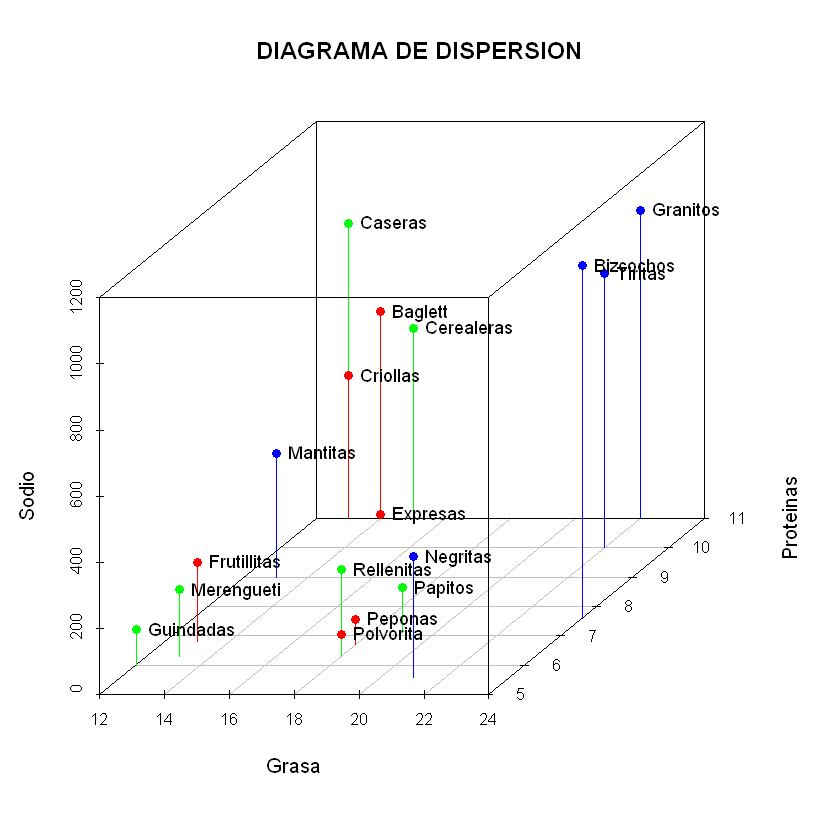

In [ ]:
  colors <- c("green", "red", "blue") #cambie los colores para que azul sea compañia C
  colors <- colors[as.factor(galletitas$Compañia)]
  with(galletitas, {
    s3d <- scatterplot3d(
      x = Grasas,
      y = Proteinas,
      z = Sodio,
      color = colors,
      pch = 16,
      type = "h",
      main = "DIAGRAMA DE DISPERSION",
      xlab = "Grasa",
      ylab = "Proteinas",
      zlab = "Sodio")

    # convert 3-D coords to 2D projection
    s3d.coords <- s3d$xyz.convert(Grasas, Proteinas, Sodio)

    # plot text with 50% shrink and place to right of points
    text(s3d.coords$x,
        s3d.coords$y,
        labels = galletitas$Marca,
        cex = .9,
        pos = 4)
  })

# Correlaciones

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



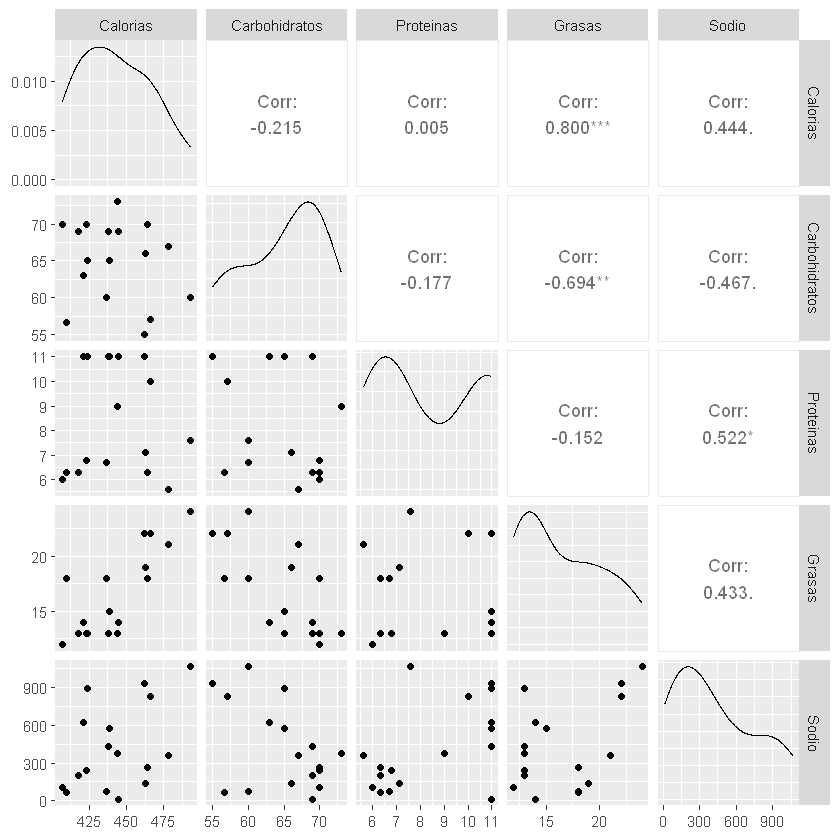

In [ ]:
library("GGally") #conda install -c conda-forge r-ggally
galletitas_plot <-ggpairs(galletitas,columns=c(4,5,6,7,8))
galletitas_plot

In [ ]:
library("ppcor")
pcor(galletitas[,4:8])

,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
Calorias,1.0000000,0.9780720,0.9005239,0.9898045,0.2057963
Carbohidratos,0.9780720,1.0000000,-0.9093259,-0.9877417,-0.1993137
Proteinas,0.9005239,-0.9093259,1.0000000,-0.9259745,0.0826773
Grasas,0.9898045,-0.9877417,-0.9259745,1.0000000,-0.1392440
Sodio,0.2057963,-0.1993137,0.0826773,-0.1392440,1.0000000
,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
Calorias,0.000000e+00,1.531063e-09,1.125584e-05,1.586464e-11,0.4802877
Carbohidratos,1.531063e-09,0.000000e+00,6.583730e-06,4.771419e-11,0.4945197
Proteinas,1.125584e-05,6.583730e-06,0.000000e+00,2.022412e-06,0.7787189
Grasas,1.586464e-11,4.771419e-11,2.022412e-06,0.000000e+00,0.6349632


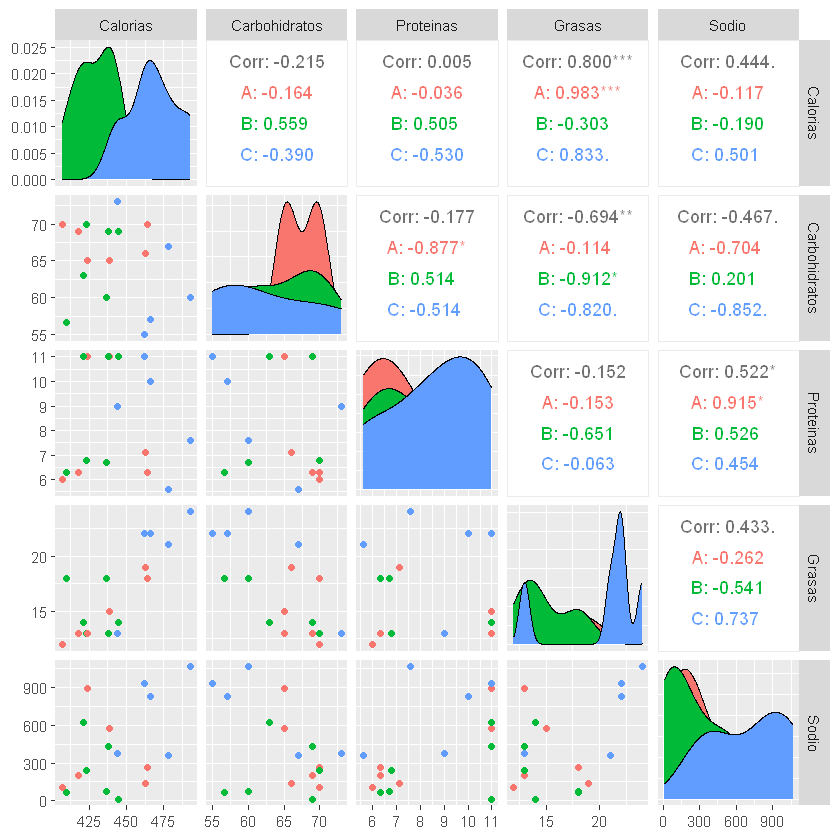

In [ ]:
galletitas_plot <-ggpairs(galletitas,columns=c(4,5,6,7,8),mapping=aes(color=as.factor(Compañia)))
galletitas_plot

# Gráficos Multivariados

In [ ]:
library(GGally)

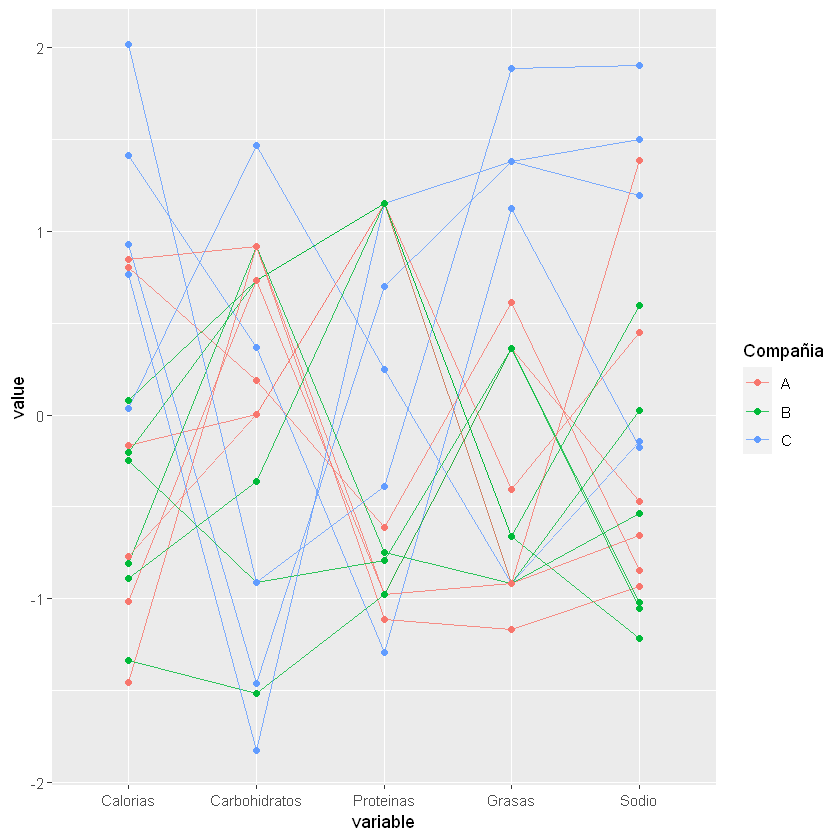

In [ ]:
ggparcoord(data = galletitas,
           columns = 4:8,
           groupColumn = "Compañia",
           showPoints = TRUE,
           alphaLines = 0.8, #TRANSPERENCIA LINEAS
           boxplot = FALSE) #DIBUJA BOXPLOT POR VARIABLE

**Gráfico de Perfiles Paralelos

In [ ]:
perfil_medio

Compañia,Marca,Tipo,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,NA,NA,435.8333,67.50000,7.95,15.0,362.1167
B,NA,NA,429.0000,64.61667,8.80,15.0,241.8950
C,NA,NA,468.6000,62.40000,8.64,20.4,712.6000


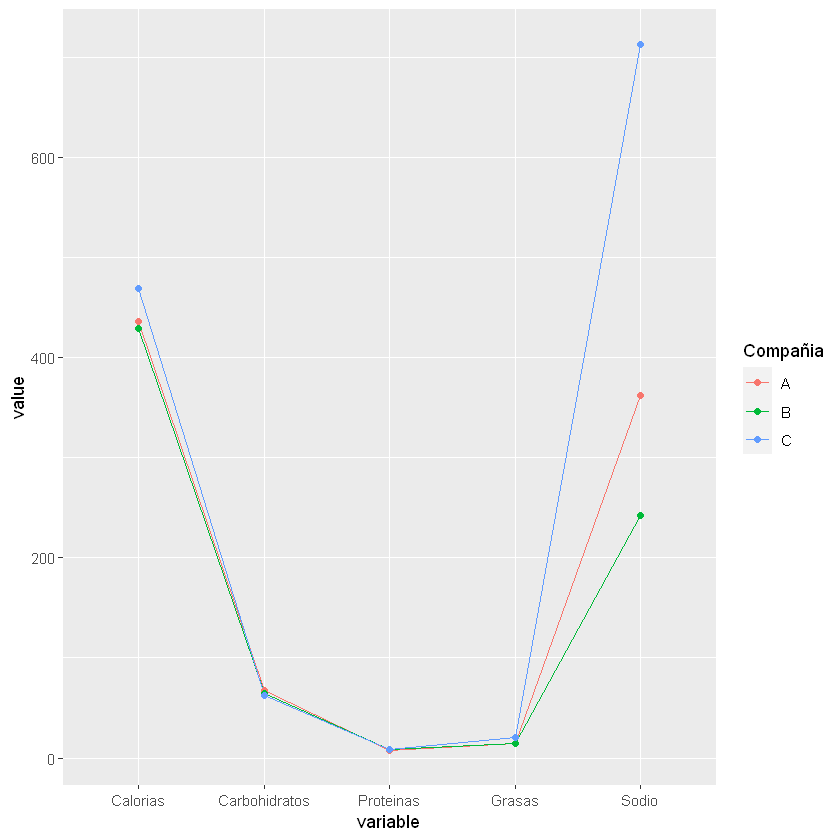

In [ ]:
ggparcoord(data = perfil_medio,
           columns = 4:8,
           groupColumn = "Compañia",
           showPoints = TRUE,
           scale = "globalminmax")


**Gráfico Diagrama Radial

In [ ]:
#correr en anaconda promp
#conda install -c conda-forge r-devtools
#correr en jupyter
#devtools::install_github("ricardo-bion/ggradar",  dependencies = TRUE)

In [ ]:
library(ggplot2)
library(ggradar)
library(scales)

In [ ]:
set.seed(4)
df <- data.frame(matrix(runif(30), ncol = 10))
df[, 1] <- paste0("G", 1:3)
colnames(df) <- c("Grupo", paste("Var", 1:9))
df

Grupo,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G1,0.2773750,0.7244059,0.07314447,0.1000535,0.4551024,0.9622046,0.9966129,0.6491614,0.8417462
G2,0.8135742,0.9060922,0.75467503,0.9540688,0.9710557,0.7617024,0.5062709,0.8308064,0.5137017
G3,0.2604278,0.9490402,0.28600062,0.4156071,0.5839880,0.7145085,0.4899432,0.4819990,0.5297775


Compañia,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,0.37209302,0.55555556,1.00000000,0.25000000,0.53320683
C,0.68604651,0.11111111,0.81481481,0.83333333,0.77419355
B,0.44186047,0.77777778,1.00000000,0.16666667,0.00000000
C,0.82558140,0.66666667,0.00000000,0.75000000,0.33301708
A,0.66279070,0.83333333,0.12962963,0.50000000,0.23814042
A,0.65116279,0.61111111,0.27777778,0.58333333,0.11764706
B,0.36046512,0.77777778,1.00000000,0.08333333,0.39753321
A,0.12790698,0.77777778,0.12962963,0.08333333,0.17931689
B,0.18604651,0.83333333,0.22222222,0.08333333,0.21726755


Compañia,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,0.3352713,0.6944444,0.4351852,0.25,0.3321790
B,0.2558140,0.5342593,0.5925926,0.25,0.2181167
C,0.7162791,0.4111111,0.5629630,0.70,0.6647059


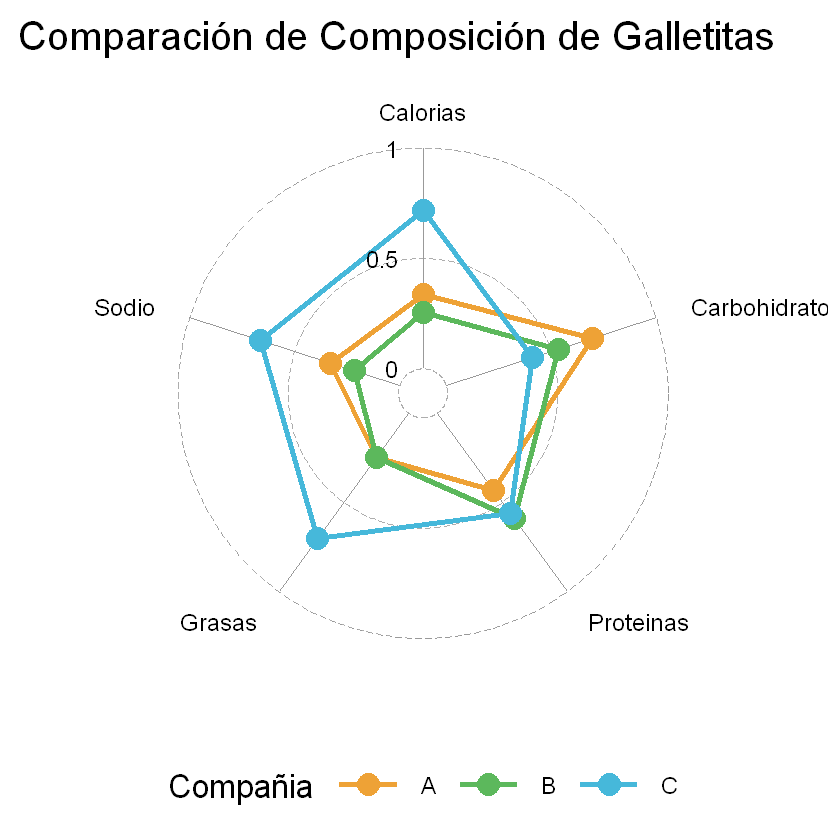

In [ ]:
dat <- data.frame("Compañia"=galletitas$Compañia,"Calorias"=rescale(galletitas$Calorias,to=c(0,1)),
                  "Carbohidratos"=rescale(galletitas$Carbohidratos,to=c(0,1)),
                  "Proteinas"=rescale(galletitas$Proteinas,to=c(0,1)),
                  "Grasas"=rescale(galletitas$Grasas,to=c(0,1)),
                  "Sodio"=rescale(galletitas$Sodio,to=c(0,1)))
dat
perfil_medio_escalado<- dat %>% group_by(Compañia) %>% summarise_all(mean)
perfil_medio_escalado

lcols <- c("#EEA236", "#5CB85C", "#46B8DA")
ggradar(perfil_medio_escalado, grid.min=0, grid.max=1,
        values.radar = c(0, 0.5, 1),
        background.circle.colour = "white",
        axis.line.colour = "gray60",
        gridline.min.colour = "gray60",
        gridline.mid.colour = "gray60",
        gridline.max.colour = "gray60",
        group.colours = lcols,
       legend.title = "Compañia",
        legend.position = "bottom") +
  labs(title = "Comparación de Composición de Galletitas")


**Gráfico de Chernoff

In [ ]:
library("aplpack") #conda install -c conda-forge r-aplpack

effect of variables:
 modified item       Var            
 "height of face   " "Calorias"     
 "width of face    " "Carbohidratos"
 "structure of face" "Proteinas"    
 "height of mouth  " "Grasas"       
 "width of mouth   " "Sodio"        
 "smiling          " "Calorias"     
 "height of eyes   " "Carbohidratos"
 "width of eyes    " "Proteinas"    
 "height of hair   " "Grasas"       
 "width of hair   "  "Sodio"        
 "style of hair   "  "Calorias"     
 "height of nose  "  "Carbohidratos"
 "width of nose   "  "Proteinas"    
 "width of ear    "  "Grasas"       
 "height of ear   "  "Sodio"        


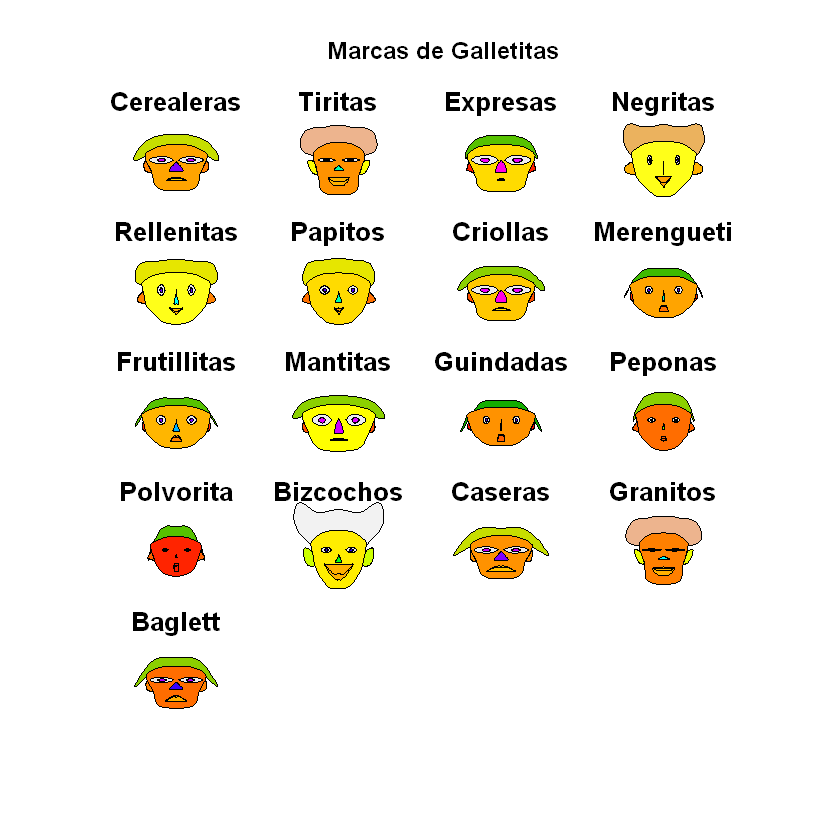

In [ ]:
Caras<-faces(galletitas[,4:8],face.type=1, main ="Marcas de Galletitas", labels=galletitas$Marca,
    print.info = 1, nrow.plot = 5, ncol.plot = 4, plot.faces = TRUE, cex = 2)

# COMPARACIÓN DE MEDIAS MULTIVARIADAS

**Test de normalidad multivariante**

In [ ]:
#Función de Mardia
mardia2<-function(datos){
  n<-nrow(datos)
  k<-ncol(datos)

  x<-as.matrix(datos)
  media<-colMeans(datos)
  matriz.media<-matrix(media,nrow=n,ncol=k,byrow=TRUE)

  S<-cov(datos)*(n-1)/n
  SI<-solve(S)   #Inversa de la matriz de covarianzas

  distm<-((x-matriz.media)%*%SI)%*%t((x-matriz.media))

  gl<-k*(k+1)*(k+2)/6

  # Medida de Asimetría Multivariada
  AM<-sum(distm^3)/n^2

  if (n<30){
  # Test Multivariado de Asimetría de Mardia - Muestras Pequeñas
  c<-(n+1)*(n+3)*(k+1)/(n*((n+1)*(k+1)-6))
  TAM<-n*c/6*AM
  valor_p1<-pchisq(TAM,gl,lower.tail = FALSE)
  } else {
    # Test Multivariado de Asimetríıa de Mardia - Muestras grandes
  TAM<-n/6*AM
  valor_p1<-pchisq(TAM,gl,lower.tail = FALSE)
  }
  #Medida de Kurtosis Multivariado
  KM<-sum((diag(distm))^2)/n

  #Test Multivariado de Kurtosis de Mardia
  TKM<-(KM-k*(k+2))*sqrt(n/(8*k*(k+2)))
  TKM2<-TKM^2
  valor_p2<-pchisq(TKM2,1,lower.tail = FALSE)

  cat("Test de Normalidad Multivariada", "\n" ,
      "Ho: Los datos siguen una Distribución Normal Multivariada","\n")
  cat("----------------------------------------------------------------","\n")
  cat("Prueba de Mardia - Asimetría","\n",
      "Asimetría Multivariada =", AM, "\n",
      "Valor de TAM =",TAM, "\n",
      "Valor p=", valor_p1, "\n")
  cat("----------------------------------------------------------------","\n")
  cat("Prueba de Mardia - Curtosis","\n",
      "Curtosis Multivariado =", KM, "\n",
      "Valor de TKM =",TKM2, "\n",
      "Valor p=", valor_p2, "\n")
     }

In [ ]:
mardia2(galletitas[,4:8])

Test de Normalidad Multivariada 
 Ho: Los datos siguen una Distribución Normal Multivariada 
---------------------------------------------------------------- 
Prueba de Mardia - Asimetría 
 Asimetría Multivariada = 14.12171 
 Valor de TAM = 49.84133 
 Valor p= 0.04961589 
---------------------------------------------------------------- 
Prueba de Mardia - Curtosis 
 Curtosis Multivariado = 33.89504 
 Valor de TKM = 0.07412829 
 Valor p= 0.7854182 


**Comparar con un vector de medias (45,9,13,150) para ver si existe diferencia**

In [ ]:
Comp_A<-filter(galletitas,Compañia=="A")
datos<-Comp_A[,5:8]
vector_media_muestral=apply(datos,2,mean) #calculamos el vector de medias
vector_media_muestral
varmuestra=round(cov(datos),2) #calculamos matriz varianza y cov redondeamos a 2 decimales

#si deseo comparar con un vector de medias (45,9,13,150) para ver si existe diferencia

u0=c(45,9,13,150)
n<-nrow(datos)
p<-ncol(datos)

F.obs=((n-p)/p)*t(vector_media_muestral-u0)%*%solve(varmuestra)%*%(vector_media_muestral-u0)
print(" p VALOR F")

1-pf(F.obs,p,n-p)

Carbohidratos     Proteinas        Grasas         Sodio 
      67.5000        7.9500       15.0000      362.1167

[1] " p VALOR F"


0.00376903


**COMPARACION DE DOS POBLACIONES MULTIVARIADAS INDEPENDIENTES

Tipo,Compañia,Marca,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dulce,NA,NA,438.2222,66.85556,6.677778,16.11111,203.23
Salada,NA,NA,448.5000,62.87500,10.450000,17.12500,669.75


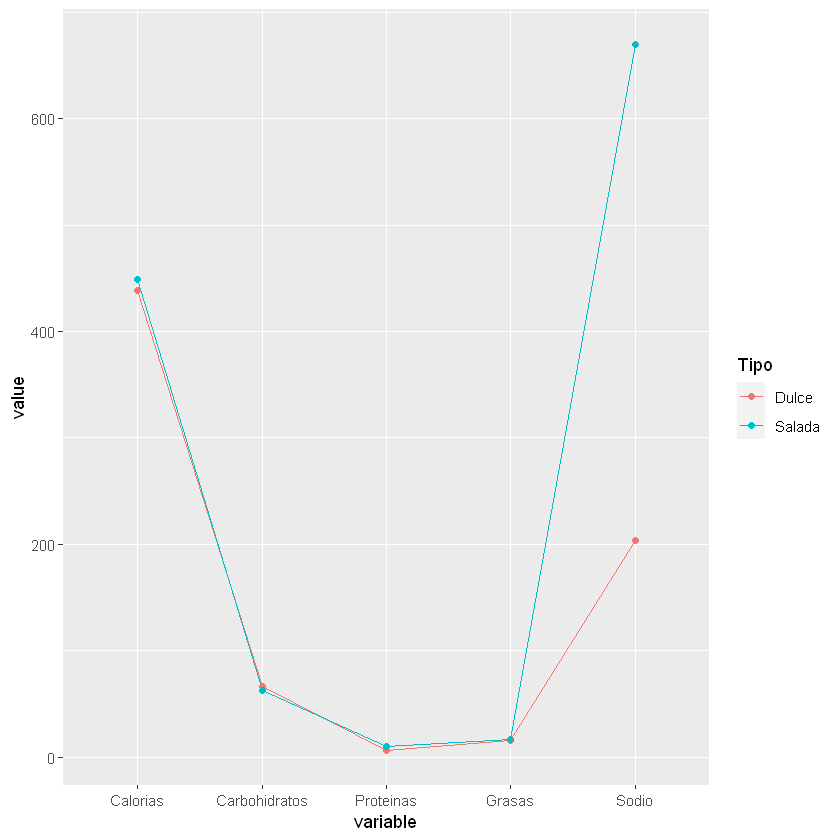

In [ ]:
perfil_medio_tipo<- galletitas %>% group_by(Tipo) %>% summarise_all(mean)
perfil_medio_tipo
ggparcoord(data = perfil_medio_tipo,
           columns = 4:8,
           groupColumn = "Tipo",
           showPoints = TRUE,
           scale = "globalminmax")

In [ ]:
Dulce=filter(galletitas, Tipo=="Dulce")[,4:8]
Salada=filter(galletitas, Tipo=="Salada")[,4:8]
prom.Dulce =apply(Dulce, 2, mean)
prom.Dulce
prom.Salada= apply(Salada, 2, mean)
prom.Salada

s1 = cov(Dulce)
s1
s2 = cov(Salada)
s2

n1 = nrow(Dulce)
n1
n2 = nrow(Salada)
n2
p = ncol(Dulce)

s = ((n1-1)*s1 + (n2-1)*s2) / (n1 + n2 - 2)
s

d2 = t(prom.Dulce-prom.Salada)%*%solve(s)%*%(prom.Dulce-prom.Salada)
d2
t2 = d2*((n1*n2) / (n1+n2))
t2
f = (n1+n2-p-1)/((n1+n2-2)*p) * t2
f
alfa = 0.05

qf(p=0.05, df1=5, df2=11, lower.tail=FALSE) #valor de constraste F

pf(f, p, n1+n2-p-1 ,lower.tail = F)  # p valor

Calorias Carbohidratos     Proteinas        Grasas         Sodio 
   438.222222     66.855556      6.677778     16.111111    203.230000

Calorias Carbohidratos     Proteinas        Grasas         Sodio 
      448.500        62.875        10.450        17.125       669.750

,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
Calorias,663.444444,25.836111,1.1055556,59.972222,1714.32125
Carbohidratos,25.836111,27.862778,1.7113889,-9.556944,423.57487
Proteinas,1.105556,1.711389,0.9544444,-1.134722,36.92200
Grasas,59.972222,-9.556944,-1.1347222,11.111111,-5.66125
Sodio,1714.321250,423.574875,36.9220000,-5.661250,13566.39660


,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
Calorias,576.85714,-71.214286,-24.114286,102.642857,3637.2857
Carbohidratos,-71.21429,26.982143,2.235714,-20.696429,-1336.3214
Proteinas,-24.11429,2.235714,1.448571,-4.035714,-215.0714
Grasas,102.64286,-20.696429,-4.035714,21.839286,1034.1786
Sodio,3637.28571,-1336.321429,-215.071429,1034.178571,114371.6429


[1] 9

[1] 8

,Calorias,Carbohidratos,Proteinas,Grasas,Sodio
Calorias,623.03704,-19.454074,-10.663704,79.885185,2611.70467
Carbohidratos,-19.45407,27.451815,1.956074,-14.755370,-397.71007
Proteinas,-10.66370,1.956074,1.185037,-2.488519,-80.67493
Grasas,79.88519,-14.755370,-2.488519,16.117593,479.59733
Sodio,2611.70467,-397.710067,-80.674933,479.597333,60608.84485


24.70309


104.6248


15.34498


[1] 3.203874

0.0001221933


In [ ]:
#conda install -c conda-forge r-hotelling
library(Hotelling)

Loading required package: corpcor


Attaching package: 'Hotelling'


The following object is masked from 'package:dplyr':

    summarise




In [ ]:
galletitas_N<-dplyr::select(galletitas,Tipo,Calorias,Carbohidratos,Proteinas,Grasas,Sodio)
fit = hotelling.test(.~Tipo, data = galletitas_N)
fit # Rechazo H0, igualdad de vectores medios y puedo seguir

Test stat:  104.62 
Numerator df:  5 
Denominator df:  11 
P-value:  0.0001222 

**COMPARACION DE TRES O MÁS POBLACIONES MULTIVARIADAS INDEPENDIENTES

In [ ]:
mod1<-manova(cbind(Calorias,Carbohidratos,Proteinas,Grasas,Sodio)~Compañia,data=galletitas)
summary(mod1)

          Df Pillai approx F num Df den Df Pr(>F)
Compañia   2 0.8952   1.7826     10     22 0.1242
Residuals 14                                     

In [ ]:
summary.aov(mod1)

 Response Calorias :
            Df Sum Sq Mean Sq F value   Pr(>F)   
Compañia     2 4760.9 2380.45  6.6228 0.009458 **
Residuals   14 5032.0  359.43                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response Carbohidratos :
            Df Sum Sq Mean Sq F value Pr(>F)
Compañia     2  72.18  36.088  1.2423 0.3187
Residuals   14 406.71  29.051               

 Response Proteinas :
            Df Sum Sq Mean Sq F value Pr(>F)
Compañia     2  2.415  1.2077  0.2236 0.8025
Residuals   14 75.627  5.4019               

 Response Grasas :
            Df Sum Sq Mean Sq F value  Pr(>F)  
Compañia     2 102.92  51.459  5.0309 0.02257 *
Residuals   14 143.20  10.229                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response Sodio :
            Df  Sum Sq Mean Sq F value  Pr(>F)  
Compañia     2  638375  319187  3.7472 0.04973 *
Residuals   14 1192531   85181                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '

Supuestos del modelo

In [ ]:
#Supuestos de normalidad
library(rstatix) #conda install -c conda-forge r-rstatix
galletitas %>% group_by(Compañia) %>%  shapiro_test(Calorias,Carbohidratos,Proteinas,Grasas,Sodio)

Compañia,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
A,Calorias,0.9046407,0.40208704
A,Carbohidratos,0.8083189,0.06973474
A,Grasas,0.8804031,0.27091345
A,Proteinas,0.7420558,0.01663660
A,Sodio,0.8395023,0.12913234
B,Calorias,0.9430552,0.68390055
B,Carbohidratos,0.8748408,0.24619181
B,Grasas,0.7617782,0.02591262
B,Proteinas,0.7250561,0.01123199


In [ ]:
#Supuestos de normalidad multivariante
mardia2(galletitas[, c("Calorias", "Carbohidratos","Proteinas","Grasas","Sodio")])

Test de Normalidad Multivariada 
 Ho: Los datos siguen una Distribución Normal Multivariada 
---------------------------------------------------------------- 
Prueba de Mardia - Asimetría 
 Asimetría Multivariada = 14.12171 
 Valor de TAM = 49.84133 
 Valor p= 0.04961589 
---------------------------------------------------------------- 
Prueba de Mardia - Curtosis 
 Curtosis Multivariado = 33.89504 
 Valor de TKM = 0.07412829 
 Valor p= 0.7854182 


In [ ]:
#prueba M de Box para evaluar la homogeneidad de las matrices de varianza-covarianza. Hipótesis nula: Las matrices de varianza-covarianza son iguales para cada combinación formada por cada grupo en la variable independiente
library(heplots) #conda install -c conda-forge r-heplots
boxM(Y =galletitas[, c("Calorias", "Carbohidratos","Proteinas","Grasas","Sodio")], group = galletitas$Compañia)

Loading required package: car

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Loading required package: broom




	Box's M-test for Homogeneity of Covariance Matrices

data:  galletitas[, c("Calorias", "Carbohidratos", "Proteinas", "Grasas",     "Sodio")]
Chi-Sq (approx.) = 108.45, df = 30, p-value = 8.227e-11
